                                                  # Reinforcement Learning                  

Reinforcement Learning (RL) is a branch of machine learning that focuses on how agents can learn to make decisions through trial and error to maximize cumulative rewards. RL allows machines to learn by interacting with an environment and receiving feedback based on their actions. This feedback comes in the form of rewards or penalties.

Reinforcement Learning revolves around the idea that an agent (the learner or decision-maker) interacts with an environment to achieve a goal. The agent performs actions and receives feedback to optimize its decision-making over time.

* Agent: The decision-maker that performs actions.
* Environment: The world or system in which the agent operates.
* State: The situation or condition the agent is currently in.
* Action: The possible moves or decisions the agent can make.
* Reward: The feedback or result from the environment based on the agent’s action.

# Core Components
Let's see the core components of Reinforcement Learning

### 1. Policy

* Defines the agent’s behavior i.e maps states for actions.
* Can be simple rules or complex computations.
* Example: An autonomous car maps pedestrian detection to make necessary stops.
### 2. Reward Signal

* Represents the goal of the RL problem.
* Guides the agent by providing feedback (positive/negative rewards).
* Example: For self-driving cars rewards can be fewer collisions, shorter travel time, lane discipline.
### 3. Value Function

* Evaluates long-term benefits, not just immediate rewards.
* Measures desirability of a state considering future outcomes.
* Example: A vehicle may avoid reckless maneuvers (short-term gain) to maximize overall safety and efficiency.
### 4. Model

* Simulates the environment to predict outcomes of actions.
* Enables planning and foresight.
* Example: Predicting other vehicles’ movements to plan safer routes.

# Working of Reinforcement Learning
The agent interacts iteratively with its environment in a feedback loop:

* The agent observes the current state of the environment.
* It chooses and performs an action based on its policy.
* The environment responds by transitioning to a new state and providing a reward (or penalty).
* The agent updates its knowledge (policy, value function) based on the reward received and the new state.
* This cycle repeats with the agent balancing exploration (trying new actions) and exploitation (using known good actions) to maximize the cumulative reward over time.

This process is mathematically framed as a Markov Decision Process (MDP) where future states depend only on the current state and action, not on the prior sequence of events.

# Implementing Reinforcement Learning

## Step 1: Import libraries and Define Maze, Start and Goa

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

maze = np.array([
    [0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 1],
    [1, 1, 1, 0, 1, 0, 1, 1, 0, 1],
    [1, 0, 0, 0, 0, 0, 1, 0, 0, 1],
    [1, 0, 1, 1, 1, 1, 1, 0, 1, 1],
    [1, 0, 1, 0, 0, 0, 0, 0, 1, 1],
    [1, 0, 1, 0, 1, 1, 1, 0, 1, 1],
    [1, 0, 1, 0, 1, 0, 0, 0, 1, 1],
    [1, 0, 1, 0, 1, 0, 1, 0, 0, 1],
    [1, 1, 1, 0, 1, 1, 1, 1, 0, 0]
])

start = (0, 0)
goal = (9, 9)

The maze is represented as a 2D NumPy array.
* Zero values are safe paths; ones are obstacles the agent must avoid.
* Start and goal define the positions where the agent begins and where it aims to reach.

## Step 2: Define RL Parameters and Initialize Q-Table

* num_episodes: Number of times the agent will attempt to navigate the maze.
* alpha: Learning rate that controls how much new information overrides old information.
* gamma: Discount factor giving more weight to immediate rewards.
* epsilon: Probability of exploration vs exploitation; starts higher to explore more.
* Rewards are set to penalize hitting obstacles, reward reaching the goal and slightly penalize each step to find shortest paths.
* actions define possible moves: left, right, up, down.
* Q is the Q-Table initialized to zero; it stores expected rewards for each state-action pair.

In [2]:
num_episodes = 5000
alpha = 0.1
gamma = 0.9
epsilon = 0.5

reward_fire = -10
reward_goal = 50
reward_step = -1

actions = [(0, -1), (0, 1), (-1, 0), (1, 0)]

Q = np.zeros(maze.shape + (len(actions),))

## Step 3: Helper Function for Maze Validity and Action Selection

* is_valid ensures the agent can only move inside the maze and avoids obstacles.
* choose_action implements exploration (random action) vs exploitation (best learned action) strategy.

In [3]:
def is_valid(pos):
    r, c = pos
    if r < 0 or r >= maze.shape[0]:
        return False
    if c < 0 or c >= maze.shape[1]:
        return False
    if maze[r, c] == 1:
        return False
    return True


def choose_action(state):
    if np.random.random() < epsilon:
        return np.random.randint(len(actions))
    else:
        return np.argmax(Q[state])

## Step 4: Train the Agent with Q-Learning Algorithm

We will train the agent by running multiple episodes for the agent to learn. During each episode, the agent selects actions and updates its Q-Table using the Q-learning update rule:

* Q(s,a)=Q(s,a)+α[r+γmax 
a 
′
 Q(s 
′
 ,a 
′
 )−Q(s,a)]

#### Where:

* s: current state (agent’s position in the maze)
* a: action taken at state s (e.g., move left, right, up, down)
* r: reward received after taking action a
* s′: next state after performing action a
* α(alpha): learning rate controlling how much new information overrides old
* γ(gamma) discount factor for future rewards

In [4]:
rewards_all_episodes = []

for episode in range(num_episodes):
    state = start
    total_rewards = 0
    done = False

    while not done:
        action_index = choose_action(state)
        action = actions[action_index]

        next_state = (state[0] + action[0], state[1] + action[1])

        if not is_valid(next_state):
            reward = reward_fire
            done = True
        elif next_state == goal:
            reward = reward_goal
            done = True
        else:
            reward = reward_step

        old_value = Q[state][action_index]
        next_max = np.max(Q[next_state]) if is_valid(next_state) else 0

        Q[state][action_index] = old_value + alpha * \
            (reward + gamma * next_max - old_value)

        state = next_state
        total_rewards += reward

    global epsilon
    epsilon = max(0.01, epsilon * 0.995)
    rewards_all_episodes.append(total_rewards)

## Step 5: Extract the Optimal Path after Training

In [5]:
def get_optimal_path(Q, start, goal, actions, maze, max_steps=200):
    path = [start]
    state = start
    visited = set()

    for _ in range(max_steps):
        if state == goal:
            break
        visited.add(state)

        best_action = None
        best_value = -float('inf')

        for idx, move in enumerate(actions):
            next_state = (state[0] + move[0], state[1] + move[1])

            if (0 <= next_state[0] < maze.shape[0] and
                0 <= next_state[1] < maze.shape[1] and
                maze[next_state] == 0 and
                    next_state not in visited):

                if Q[state][idx] > best_value:
                    best_value = Q[state][idx]
                    best_action = idx

        if best_action is None:
            break

        move = actions[best_action]
        state = (state[0] + move[0], state[1] + move[1])
        path.append(state)

    return path


optimal_path = get_optimal_path(Q, start, goal, actions, maze)

## Step 6: Visualize the Maze, Robot Path, Start and Goal

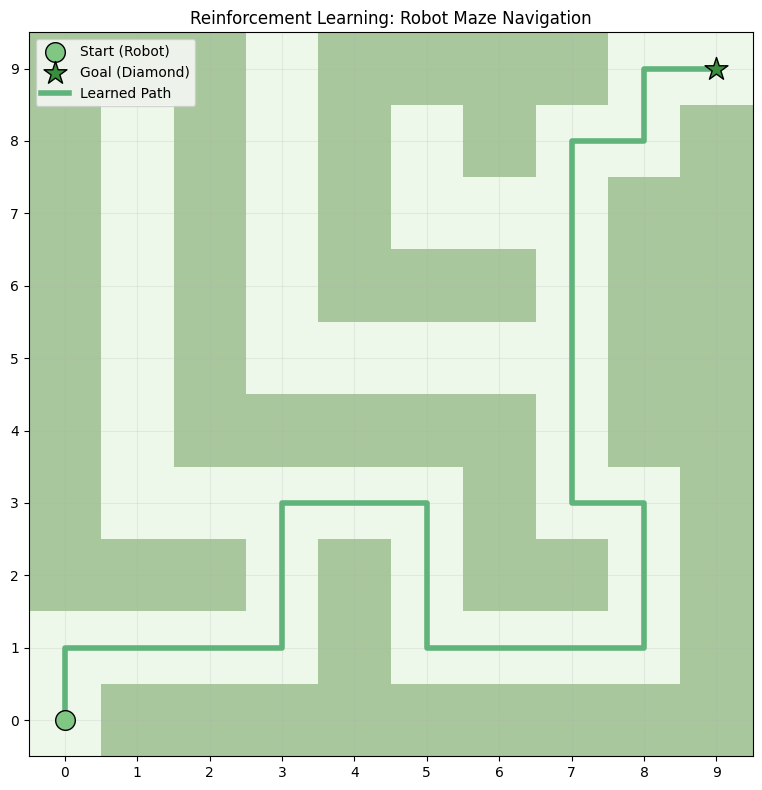

In [6]:
def plot_maze_with_path(path):
    cmap = ListedColormap(['#eef8ea', '#a8c79c'])

    plt.figure(figsize=(8, 8))
    plt.imshow(maze, cmap=cmap)

    plt.scatter(start[1], start[0], marker='o', color='#81c784', edgecolors='black',
                s=200, label='Start (Robot)', zorder=5)
    plt.scatter(goal[1], goal[0], marker='*', color='#388e3c', edgecolors='black',
                s=300, label='Goal (Diamond)', zorder=5)

    rows, cols = zip(*path)
    plt.plot(cols, rows, color='#60b37a', linewidth=4,
             label='Learned Path', zorder=4)

    plt.title('Reinforcement Learning: Robot Maze Navigation')
    plt.gca().invert_yaxis()
    plt.xticks(range(maze.shape[1]))
    plt.yticks(range(maze.shape[0]))
    plt.grid(True, alpha=0.2)
    plt.legend()
    plt.tight_layout()
    plt.show()


plot_maze_with_path(optimal_path)

## Step 7: Plot Rewards per Training

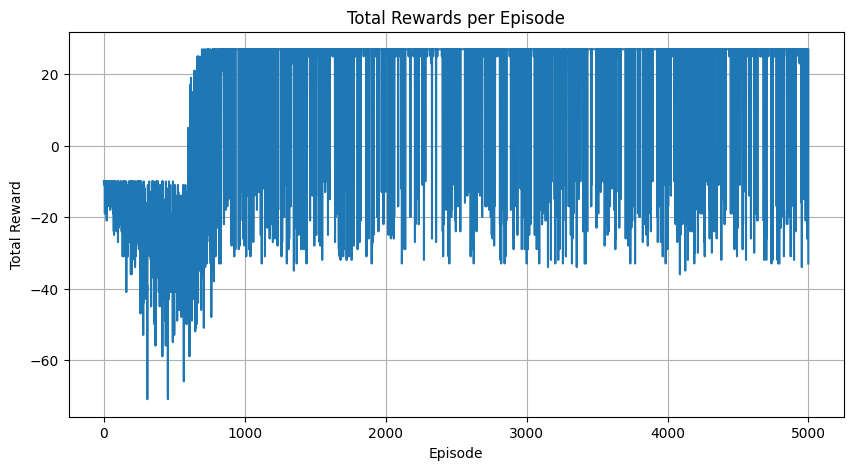

In [7]:
def plot_rewards(rewards):
    plt.figure(figsize=(10, 5))
    plt.plot(rewards)
    plt.title('Total Rewards per Episode')
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.grid(True)
    plt.show()


plot_rewards(rewards_all_episodes)

## Types of Reinforcements
### 1. Positive Reinforcement: Positive Reinforcement is defined as when an event, occurs due to a particular behavior, increases the strength and the frequency of the behavior. In other words, it has a positive effect on behavior. 

* Advantages: Maximizes performance, helps sustain change over time.
* Disadvantages: Overuse can lead to excess states that may reduce effectiveness.

### 2. Negative Reinforcement: Negative Reinforcement is defined as strengthening of behavior because a negative condition is stopped or avoided. 

* Advantages: Increases behavior frequency, ensures a minimum performance standard.
* Disadvantages: It may only encourage just enough action to avoid penalties.

## Online vs. Offline Learning

Reinforcement Learning can be categorized based on how and when the learning agent acquires data from its environment, dividing the methods into online RL and offline RL (also known as batch RL).

* In online RL, the agent learns by actively interacting with the environment in real-time. It collects fresh data during training by executing actions and observing immediate feedback as it learns.
* Offline RL trains the agent exclusively on a pre-collected static dataset of interactions generated by other agents, human demonstrations or historical logs. The agent does not interact with the environment during learning.

# Markov Decision Process

Markov Decision Process (MDP) is a way to describe how a decision-making agent like a robot or game character moves through different situations while trying to achieve a goal. MDPs rely on variables such as the environment, agent’s actions and rewards to decide the system’s next optimal action. It helps us answer questions like:

* What actions should the agent take?
* What happens after an action?
* Is the result good or bad?

In artificial intelligence Markov Decision Processes (MDPs) are used to model situations where decisions are made one after another and the results of actions are uncertain. They help in designing smart machines or agents that need to work in environments where each action might led to different outcomes.

Key Components of an MDP

1. States (S): A state is a situation or condition the agent can be in. For example, A position on a grid like being at cell (1,1).

2. Actions (A): An action is something the agent can do. For example, Move UP, DOWN, LEFT or RIGHT. Each state can have one or more possible actions.

3. Transition Model (T): The model tells us what happens when an action is taken in a state. It’s like asking: “If I move RIGHT from here, where will I land?” Sometimes the outcome isn’t always the same that’s uncertainty. For example:

* 80% chance of moving in the intended direction
* 10% chance of slipping to the left
* 10% chance of slipping to the right
This randomness is called a stochastic transition.

4. Reward (R): A reward is a number given to the agent after it takes an action. If the reward is positive, it means the result of the action was good. If the reward is negative it means the outcome was bad or there was a penalty help the agent learn what’s good or bad. Examples:

* +1 for reaching the goal
* -1 for stepping into fire
* -0.1 for each step to encourage fewer moves
5. Policy (π): A policy is the agent’s plan. It tells the agent: “If you are in this state, take this action.” The goal is to find the best policy that helps the agent earn the highest total reward over time.

Applications
Markov Decision Processes are useful in many real-life situations where decisions must be made step-by-step under uncertainty. Here are some applications:

* Robots and Machines: Robots use MDPs to decide how to move safely and efficiently in places like factories or warehouses and avoid obstacles.
* Game Strategy: In board games or video games MDPs help characters to choose the best moves to win or complete tasks even when outcomes are not certain.
* Healthcare: Doctors can use it to plan treatments for patients, choosing actions that improve health while considering uncertain effects.
* Traffic and Navigation: Self-driving cars or delivery vehicles use it to find safe routes and avoid accidents on unpredictable roads.
* Inventory Management: Stores and warehouses use MDPs to decide when to order more stock so they don’t run out or keep too much even when demand changes.

# Bellman Equation  

The Bellman Equation is a formula used in reinforcement learning to calculate the value of a state. It says that the value of a state is equal to the reward received now plus the expected value of the next state. This helps an agent make better decisions by considering both immediate and future rewards. It is based on the principle of optimality which means the best value of a state depends on the immediate reward and the value of the next state.

## 1. Bellman Equation for State Value Function

State value function denoted as 
V(s) under a given policy represents the expected cumulative reward when starting from state 
s and following that policy:

V 
π
 (s)=E[R(s,a)+γV 
π
 (s 
′
 )]

Expanding this equation with transition probabilities we get:

V 
π
 (s)=∑ 
a∈A`
​
 π(a∣s)∑ 
s 
′
 ∈S
​
 P(s 
′
 ∣s,a)[R(s,a)+γV 
π
 (s 
′
 )]

where:

* V 
π
 (s): Value function of state s under policy.
* P(s 
′
 ∣s,a): Transition probability from state 
s to state 
s 
′
  when taking action 
a.
* R(s,a): Reward obtained after taking action 
a in state 
s.
* γ: Discount factor controlling the importance of future rewards.
* π(a∣s): Probability of taking action 
a in state 
s under policy .

## 2. Bellman Equation for Action Value Function (Q-function)

Q-function (
Q(s,a)) represents the expected return for taking action 
a in state s and following the policy afterward:

Q 
π
 (s,a)=E[R(s,a)+γV 
π
 (s 
′
 )]

Expanding it using transition probabilities:

Q 
π
 (s,a)=∑ 
s 
′
 ∈S
​
 P(s 
′
 ∣s,a)[R(s,a)+γ∑ 
a 
′
 
​
 π(a 
′
 ∣s 
′
 )Q 
π
 (s 
′
 ,a 
′
 )]

This equation helps compute the expected future rewards based on both current action 
a and subsequent policy actions.

### Bellman Optimality Equations
For an optimal policy 
π 
∗
 , the Bellman equation becomes:

1. Optimal State Value Function

V 
∗
 (s)=max 
a

 ∑ 
s 
′
​
 P(s 
′
 ∣s,a)[R(s,a)+γV 
∗
 (s 
′
 )]

2. Optimal Action Value Function (Q-Learning)

Q 
∗
 (s,a)=∑ 
s 
′
​
 P(s 
′
 ∣s,a)[R(s,a)+γmax 
a 
′
​
 Q 
∗
 (s 
′
 ,a 
′
 )]

These equations form the foundation for Dynamic Programming, Temporal Difference (TD) Learning and Q-Learning.

Solving MDPs with Bellman Equations
Markov Decision Process can be solved using Dynamic Programming (DP) methods that rely on Bellman Equations:

* Value Iteration: Uses Bellman Optimality Equation to iteratively update value functions until convergence.
* Policy Iteration: Alternates between policy evaluation (solving Bellman Expectation Equation) and policy improvement (updating policy based on new value function).
* Q-Learning: Uses the Bellman Optimality Equation for Q-values to learn optimal policies.

# Q-Learning in Reinforcement Learning

Q-Learning is a popular model-free reinforcement learning algorithm that helps an agent learn how to make the best decisions by interacting with its environment. Instead of needing a model of the environment the agent learns purely from experience by trying different actions and seeing their results

Imagine a system that sees an apple but incorrectly says, “It’s a mango.” The system is told, “Wrong! It’s an apple.” It learns from this mistake. Next time, when shown the apple, it correctly says “It’s an apple.” This trial-and-error process, guided by feedback is like how Q-Learning works

The core idea is that the agent builds a Q-table which stores Q-values. Each Q-value estimates how good it is to take a specific action in a given state in terms of the expected future rewards. Over time the agent updates this table using the feedback it receives

### Key Components
1. Q-Values or Action-Values
Q-values represent the expected rewards for taking an action in a specific state. These values are updated over time using the Temporal Difference (TD) update rule.

2. Rewards and Episodes
The agent moves through different states by taking actions and receiving rewards. The process continues until the agent reaches a terminal state which ends the episode.

3. Temporal Difference or TD-Update
The agent updates Q-values using the formula:

Q(S,A)←Q(S,A)+α(R+γQ(S 
′
 ,A 
′
 )−Q(S,A))

 Where,

* S is the current state.
* A is the action taken by the agent.
* S' is the next state the agent moves to.
* A' is the best next action in state S'.
* R is the reward received for taking action A in state S.
* γ (Gamma) is the discount factor which balances immediate rewards with future rewards.
* α (Alpha) is the learning rate determining how much new information affects the old Q-values.

4. ϵ-greedy Policy (Exploration vs. Exploitation)
The ϵ-greedy policy helps the agent decide which action to take based on the current Q-value estimates:

* Exploitation: The agent picks the action with the highest Q-value with probability 
1−ϵ. This means the agent uses its current knowledge to maximize rewards.
* Exploration: With probability 
ϵ, the agent picks a random action, exploring new possibilities to learn if there are better ways to get rewards. This allows the agent to discover new strategies and improve its decision-making over time.

# How does Q-Learning Works?
Q-learning models follow an iterative process where different components work together to train the agent. Here's how it works step-by-step:

* Initialize the Q-Table: The agent starts with a Q-table filled with zeros. The table has rows for each state and columns for each possible action.
* Choose an Action: The agent selects an action based on the current state using an ϵ-greedy policy. This means it will either explore a random action or exploit the best-known action based on the Q-values.
* Perform the Action: The agent executes the chosen action in the environment.
* Measure the Reward and Next State: After performing the action, the agent receives a reward from the environment and observes the new state it has transitioned to.
* Update the Q-Value: The agent updates the Q-value for the state-action pair using the Q-learning update rule:
Q(s,a)=Q(s,a)+α[r+γmax a ′ Q(s ′ ,a ′ )−Q(s,a)]

Where:
* s: current state (agent’s position in the maze)
* a: action taken at state s (e.g., move left, right, up, down)
* r: reward received after taking action a
* s′: next state after performing action a
* α(alpha): learning rate controlling how much new information overrides old
* γ(gamma) discount factor for future rewards
Repeat: The agent repeats steps 2-6 for a set number of episodes or until it converges to an optimal policy.


### Methods for Determining Q-values
1. Temporal Difference (TD):
Temporal Difference is calculated by comparing the current state and action values with the previous ones. It provides a way to learn directly from experience, without needing a model of the environment.

2. Bellman’s Equation:
Bellman’s Equation is a recursive formula used to calculate the value of a given state and determine the optimal action. It is fundamental in the context of Q-learning and is expressed as:

Q(s,a)=R(s,a)+γmax 
a
​
 Q(s 
′
 ,a)

Where:

* Q(s, a) is the Q-value for a given state-action pair.
* R(s, a) is the immediate reward for taking action a in state s.
* γ is the discount factor, representing the importance of future rewards.
* max 
a
​
 Q(s 
′
 ,a) is the maximum Q-value for the next state s' and all possible actions.

## What is a Q-table?
The Q-table is essentially a memory structure where the agent stores information about which actions yield the best rewards in each state. It is a table of Q-values representing the agent's understanding of the environment. As the agent explores and learns from its interactions with the environment, it updates the Q-table. The Q-table helps the agent make informed decisions by showing which actions are likely to lead to better rewards.

### Structure of a Q-table:

* Rows represent the states.
* Columns represent the possible actions.
* Each entry in the table corresponds to the Q-value for a state-action pair.
* Over time, as the agent learns and refines its Q-values through exploration and exploitation, the Q-table evolves to reflect the best actions for each state, leading to optimal decision-making.

# Implementation
Here, we implement basic Q-learning algorithm where agent learns the optimal action-selection strategy to reach a goal state in a grid-like environment.

### Step 1: Define the Environment

### Step 2: Set Hyperparameters

### Step 3: Define the State Transition Function

### Step 4: Implement the Q-Learning Algorithm

### Step 5: Output the Learned Q-Table

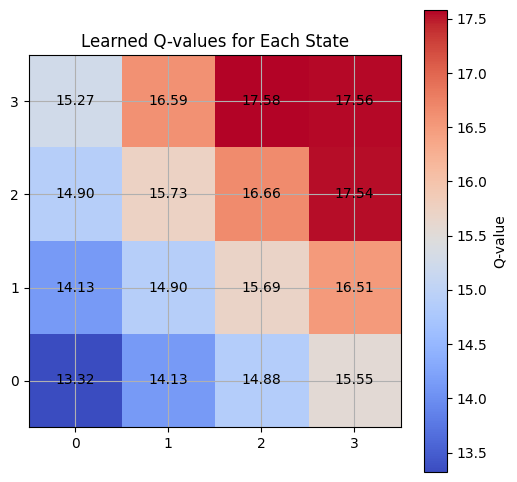

Learned Q-table:
[[12.22214891 12.77630982  8.37552454 13.32078684]
 [12.39717646 13.54162999 12.89967243 14.1307513 ]
 [12.71491455 11.73760035 10.76004145 14.87839636]
 [13.54222304 13.08368587 11.43534557 15.54864019]
 [12.45542517 13.93184181 12.46790707 14.1312976 ]
 [12.95401542 13.52755773 12.99679751 14.89952661]
 [13.67186969 14.49436117 13.34720369 15.68524379]
 [14.77574291 12.60369522 13.37545026 16.50517134]
 [13.62272538 14.89930127 12.02997887 14.46781036]
 [13.90724602 15.73370538 13.76602633 14.9027512 ]
 [14.6672273  16.34650849 14.78105181 16.66375302]
 [15.27856713 16.31061933 15.43976106 17.54411154]
 [10.06763408 15.26548241 13.28324278 10.12530824]
 [13.9784045  16.58578066 14.46438309 15.03585463]
 [15.60911928 17.5810388  15.25003334 16.42190249]
 [11.81451675 17.55981248 11.81451675 16.71512531]]


In [8]:
import numpy as np
import matplotlib.pyplot as plt

n_states = 16         
n_actions = 4          
goal_state = 15        

Q_table = np.zeros((n_states, n_actions))

# Step 2: Set Hyperparameters
learning_rate = 0.8
discount_factor = 0.95
exploration_prob = 0.2
epochs = 1000

# Step 3: Define the State Transition Function

def get_next_state(state, action):
    row, col = divmod(state, 4)  

    if action == 0 and col > 0:        
        col -= 1
    elif action == 1 and col < 3:      
        col += 1
    elif action == 2 and row > 0:     
        row -= 1
    elif action == 3 and row < 3:     
        row += 1

    return row * 4 + col

# Step 4: Implement the Q-Learning Algorithm
for epoch in range(epochs):
    current_state = np.random.randint(0, n_states)  

    while True:
        if np.random.rand() < exploration_prob:
            action = np.random.randint(0, n_actions)
        else:
            action = np.argmax(Q_table[current_state])

        next_state = get_next_state(current_state, action)

        reward = 1 if next_state == goal_state else 0

        Q_table[current_state, action] += learning_rate * (
            reward + discount_factor * np.max(Q_table[next_state]) - Q_table[current_state, action]
        )

        if next_state == goal_state:
            break

        current_state = next_state

# Step 5: Output the Learned Q-Table
q_values_grid = np.max(Q_table, axis=1).reshape((4, 4))

plt.figure(figsize=(6, 6))
plt.imshow(q_values_grid, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Q-value')
plt.title('Learned Q-values for Each State')
plt.xticks(np.arange(4), ['0', '1', '2', '3'])
plt.yticks(np.arange(4), ['0', '1', '2', '3'])
plt.gca().invert_yaxis()
plt.grid(True)

for i in range(4):
    for j in range(4):
        plt.text(j, i, f'{q_values_grid[i, j]:.2f}', ha='center', va='center', color='black')

plt.show()

print("Learned Q-table:")
print(Q_table)


* Each row index (0–15) represents a state in the 4×4 grid.
* Each column value shows the Q-value for the actions [Left, Right, Up, Down].
* Higher Q-values indicate better actions that move the agent closer to the goal.

For instance:

* In the last few rows (states 12–15), the Q-values are noticeably higher (around 15–17). This means the agent has learned that these states are near the goal state (15) and should move toward it.
* The top rows (states 0–3) have lower Q-values (around 8–13), showing that those positions are far from the goal and require more steps to reach it.
* The agent’s policy i.e best action from each state would be the action corresponding to the maximum Q-value in that row.

# SARSA (State-Action-Reward-State-Action) in Reinforcement Learning

SARSA (State-Action-Reward-State-Action) is an on-policy reinforcement learning (RL) algorithm that helps an agent to learn an optimal policy by interacting with its environment. The agent explores its environment, takes actions, receives feedback and continuously updates its behavior to maximize long-term rewards.

Unlike off-policy algorithms like Q-learning which learn from the best possible actions, it updates its knowledge based on the actual actions the agent takes. This makes it suitable for environments where the agent's actions and their immediate feedback directly influence learning.

## Components
Components of the SARSA Algorithm are as follows:

* State (S): The current situation or position in the environment.
* Action (A): The decision or move the agent makes in a given state.
* Reward (R): The immediate feedback or outcome the agent receives after taking an action.
* Next State (S'): The state the agent transitions to after taking an action.
* Next Action (A'): The action the agent will take in the next state based on its current policy.
* SARSA focuses on updating the agent's Q-values (a measure of the quality of a given state-action pair) based on both the immediate reward and the expected future rewards.

## How does SARSA Updates Q-values?
SARSA updates the Q-value using the Bellman Equation for SARSA:

Q(s 
t
​
 ,a 
t
​
 )←Q(s 
t
​
 ,a 
t
​
 )+α[r 
t+1
​
 +γQ(s 
t+1
​
 ,a 
t+1
​
 )−Q(s 
t
​
 ,a 
t
​
 )]

Where:


* Q(s 
t
​
 ,a 
t
​
 ) is the current Q-value for the state-action pair at time step t.
* α is the learning rate (a value between 0 and 1) which determines how much the Q-values are updated.
* r 
t+1
​
 ​ is immediate reward the agent receives after taking action 
a 
t
​
 ​ in state 
s 
t
​
 ​.
* γ is the discount factor (between 0 and 1) which shows the importance of future rewards.
* Q(s 
t+1
​
 ,a 
t+1
​
 ) is the Q-value for the next state-action pair.

Understanding the Update
* Immediate Reward: The agent gets reward ​
r 
t+1
​
  after taking action 
a 
t
​
 ​ in state 
s 
t
​
 ​.
* Future Reward: It uses 
Q(s 
t+1
​
 ,a 
t+1
​
 ) to estimate future returns.
* Correction: The Q-value is adjusted based on the difference between expected and actual rewards.

### SARSA Algorithm Steps
Lets see how the SARSA algorithm works step-by-step:

1. Initialize Q-values: Begin by setting arbitrary values for the Q-table (for each state-action pair).

2. Choose Initial State: Start the agent in an initial state 
s 
0
​
 .

3. Episode Loop: For each episode (a complete run through the environment) we set the initial state 
s 
t
​
 ​ and choose an action 
a 
t
​
 ​ based on a policy like 
ε.

4. Step Loop: For each step in the episode:

Take action 
a 
t
​
 ​ observe reward 
R 
t+1
​
 ​ and transition to the next state 
s 
t+1
​
 ​.
* Choose the next action 
a 
t+1
​
 ​ based on the policy for state 
s 
t+1
​
 .
* Update the Q-value for the state-action pair 
(s 
t
​
 ,a 
t
​
 ) using the SARSA update rule.
Set 
s 
t
​
 =s 
t+1
​
 ​ and 
a 
t
​
 =a 
t+1
​
 ​.
5. End Condition: Repeat until the episode ends either because the agent reaches a terminal state or after a fixed number of steps.



# Implementation

In [11]:
# Step 1: Defining the Environment (GridWorld)

import numpy as np
import random


class GridWorld:
    def __init__(self, width, height, start, goal, obstacles):
        self.width = width
        self.height = height
        self.start = start
        self.goal = goal
        self.obstacles = obstacles
        self.state = start

    def reset(self):
        self.state = self.start
        return self.state

    def step(self, action):
        x, y = self.state
        if action == 0:
            x = max(x - 1, 0)
        elif action == 1:
            x = min(x + 1, self.height - 1)
        elif action == 2:
            y = max(y - 1, 0)
        elif action == 3:
            y = min(y + 1, self.width - 1)

        next_state = (x, y)

        if next_state in self.obstacles:
            reward = -10
            done = True
        elif next_state == self.goal:
            reward = 10
            done = True
        else:
            reward = -1
            done = False

        self.state = next_state
        return next_state, reward, done
    
# Step 2: Defining the SARSA Algorithm

def sarsa(env, episodes, alpha, gamma, epsilon):
    Q = np.zeros((env.height, env.width, 4))

    for episode in range(episodes):
        state = env.reset()
        action = epsilon_greedy_policy(Q, state, epsilon)
        done = False

        while not done:
            next_state, reward, done = env.step(action)
            next_action = epsilon_greedy_policy(Q, next_state, epsilon)

            Q[state[0], state[1], action] += alpha * \
                (reward + gamma * Q[next_state[0], next_state[1],
                 next_action] - Q[state[0], state[1], action])

            state = next_state
            action = next_action

    return Q

# Step 3: Defining the Epsilon-Greedy Policy

def epsilon_greedy_policy(Q, state, epsilon):
    if random.uniform(0, 1) < epsilon:
        return random.randint(0, 3)
    else:
        return np.argmax(Q[state[0], state[1]])
    
# Step 4: Setting Up the Environment and Running SARSA
if __name__ == "__main__":

    width = 5
    height = 5
    start = (0, 0)
    goal = (4, 4)
    obstacles = [(2, 2), (3, 2)]
    env = GridWorld(width, height, start, goal, obstacles)

    episodes = 1000
    alpha = 0.1
    gamma = 0.99
    epsilon = 0.1

    Q = sarsa(env, episodes, alpha, gamma, epsilon)

    print("Learned Q-values:")
    print(Q)

Learned Q-values:
[[[-0.91070874 -0.60606016 -1.66371557  0.49084497]
  [-0.20555569  1.51062361 -1.53395655  0.870499  ]
  [-1.72471926 -1.08540994 -1.80067596  2.09390559]
  [-0.06256049  4.7630297  -1.01987176 -1.28484447]
  [-0.86945482  0.82535464 -0.8760879  -1.05705813]]

 [[-2.69704202 -2.90073126 -2.91911074  1.69001077]
  [-0.54763898 -1.43181985 -0.40301572  3.19496947]
  [ 0.4981081  -9.35389181  1.08489987  4.22037406]
  [ 2.58842787  5.1526535   1.87007827  3.48029779]
  [-0.58650154  7.16376416  0.30317541  0.46225783]]

 [[-1.86318942 -2.23059053 -2.37475148 -2.2290658 ]
  [-1.36316096  0.52489255 -2.04830986 -3.439     ]
  [ 0.          0.          0.          0.        ]
  [ 3.26938261  4.67126428 -9.11370619  7.57905849]
  [ 2.86620472  8.79710056  4.44357028  5.92704883]]

 [[-1.68527877 -1.58444712 -1.78025383 -0.90624352]
  [-1.2384361   3.57566606 -1.55738865 -1.9       ]
  [ 0.          0.          0.          0.        ]
  [ 0.24226115  2.29866553 -2.71        

# Deep Q-Learning in Reinforcement Learning

Deep Q-Learning is a method that uses deep learning to help machines make decisions in complicated situations. It’s especially useful in environments where the number of possible situations called states is very large like in video games or robotics.

Before understanding Deep Q-Learning it’s important to understand the main concept of Q-Learning. It is a model-free method that learns an optimal policy by estimating the Q-value function which tells how good it is to take a certain action in a certain situation. The goal is to find a plan that gives the highest total reward over time.


Q-Learning works well for small problems but struggles with complex ones like images or many possible situations. Deep Q-Learning solves this by using a neural network to estimate values instead of a big table.

## Architecture of Deep Q-Networks
A DQN consists of the following components:

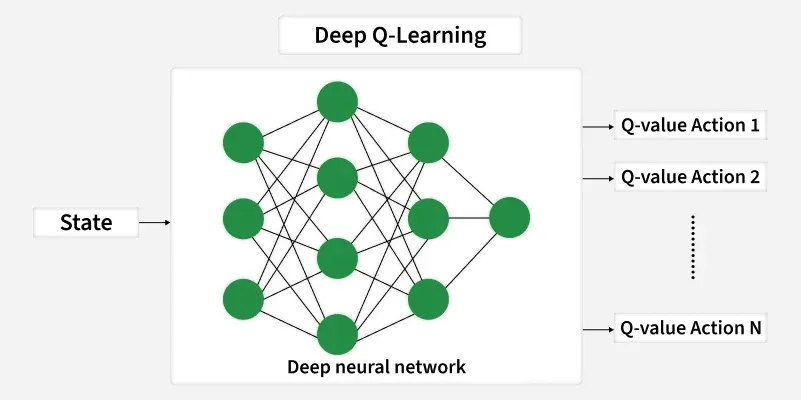

1. Neural Network
The network approximates the Q-value function 
Q(s,a;θ) where 
θ represents the trainable parameters.
For example in Atari games the input might be raw pixels from the game screen and the output is a vector of Q-values corresponding to each possible action.
2. Experience Replay
To stabilize training, DQNs store past experiences 
(s,a,r,s′) in a replay buffer.
During training, mini-batches of experiences are sampled randomly from the buffer, breaking the correlation between consecutive experiences and improving generalization.
3. Target Network
A separate target network with parameters 
θ 
−
  is used to compute the target Q-values during updates. The target network is periodically updated with the weights of the main network to ensure stability.
4. Loss Function :
The loss function measures the difference between the predicted Q-values and the target Q-values:

L(θ)=E[(r+γmax a ′Q(s′,a ′;θ −)−Q(s,a;θ)) 2]

## Training Process

The training process of a DQN involves the following steps:

1. Initialization 

2. Exploration vs. Exploitation 

3. Experience Collection 

4. Training Updates 

5. Target Network Update

6. Decay Exploration Rate

# Policy Gradient Methods in Reinforcement Learning

Policy Gradient methods in Reinforcement Learning (RL) to directly optimize the policy, unlike value-based methods that estimate the value of states. These methods are particularly useful in environments with continuous action spaces or complex tasks where value-based approaches struggle. Given a policy 
π parameterized by 
θ, the goal is to optimize the objective:

J(θ)=E[∑ 
t
 R 
t
 ]

Where 
R 
t
​
  is the reward at time 
t and the expectation is taken over states and actions under the policy 
π 
θ
​
 ​.

### Working

The core idea behind policy gradient methods is to compute the gradient of the objective function 
J(θ) with respect to the policy parameters 
θ. The general algorithm involves the following steps:

* Rollout: The agent interacts with the environment following the current policy, collecting states, actions and rewards.
* Compute the Return: The return 
G 
t
​
 ​ is the cumulative reward obtained from time step t onwards. This is often computed as the discounted sum of rewards.
* Compute the Gradient: The gradient of the objective function with respect to the policy parameters is computed using the collected data.
* Update the Policy: The policy parameters are updated using gradient ascent to improve the expected return.
Policy gradient helps improve decisions by checking how each action affects the total reward. Using the likelihood ratio method we adjust the policy to make better choices over time.

### Types of Policy Gradient Methods
1. REINFORCE Algorithm
REINFORCE is a simple Monte Carlo method that directly estimates the policy gradient using complete episodes from the environment. It updates the policy parameters based on the log probability of actions taken, weighted by the return (cumulative reward) from those actions. While simple it can suffer from high variance in the gradient estimates.

2. Actor-Critic Methods
Actor-Critic methods use two parts: the actor which decides what action to take and the critic which evaluates how good that action was. The critic provides feedback to the actor help to improve its decisions. This setup makes learning more stable and reduces the randomness in the updates.

3. Proximal Policy Optimization (PPO)
Proximal Policy Optimization (PPO) is a method that carefully updates the decision-making rules. It avoids making big changes at once which helps keep training steady. This balance makes PPO reliable and popular for tough problems.
